## Part 1： 模型理论与应用
在第一部分主要以证明和推导为主。以下几个问题都是比较经典的问题，会对模型的深入理解会有很大的帮助。

### Part 1.1 逻辑回归相关 (30分)
假设我们有训练数据$D=\{(\mathbf{x}_1,y_1),...,(\mathbf{x}_n,y_n)\}$, 其中$(\mathbf{x}_i,y_i)$为每一个样本，而且$\mathbf{x}_i$是样本的特征并且$\mathbf{x}_i\in \mathcal{R}^D$, $y_i$代表样本数据的标签（label）, 取值为$0$或者$1$. 在逻辑回归中，模型的参数为$(\mathbf{w},b)$。对于向量，我们一般用粗体来表达。请回答以下问题。最好用Markdown自带的Latex来编写。（如果实在不行，可以手写然后拍照完放入word或者转成PDF，作为独立的文件来提交）

(a) 在逻辑回归模型下，请写出目标函数（objective function）, 也就是我们需要"最小化"的目标（也称之为损失函数或者loss function)，不需要考虑正则 （3分）

$L(\mathbf{w},b)= -\sum_{i=0}^n y_i\log{p(y_i=1|x_i,w,b)}+(1-y_i)\log{1-p(y_i=1|x_i,w,b)}  $

(b) 求出$L(\mathbf{w},b)$的梯度（或者计算导数），需要必要的中间过程。（5分）

$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{w}}=\sum_{i=0}^n [\sigma(w^Tx_i+b)-y_i]x_i$

$\frac{\partial L(\mathbf{w},b)}{\partial b}=\sum_{i=0}^n [\sigma(w^Tx_i+b)-y_i]$

(c) 请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （5分）

$w^{t+1}=w^t - \eta\sum_{i=0}^m\frac{\partial L(w,b)}{\partial w} $

$b^{t+1}=w^t - \eta\sum_{i=0}^m\frac{\partial L(w,b)}{\partial b}$

(d) 假设在(a)的基础上加了一个L2正则项，请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （5分）

$w^{t+1}=w^t - \eta\sum_{i=0}^m\frac{\partial L(w,b)}{\partial w} + w_t $

$b^{t+1}=w^t - \eta\sum_{i=0}^m\frac{\partial L(w,b)}{\partial b}$

接下来我们来证明逻辑回归函数是凸函数。假设一个函数是凸函数，我们则可以得出局部最优解即为全局最优解，所以假设我们通过随机梯度下降法等手段找到最优解
时我们就可以确认这个解就是全局最优解。证明凸函数的方法有很多种，在这里我们介绍一种方法，就是基于二次求导大于等于0。比如给定一个函数$f(x)=x^2-3x+3$，做两次
求导之后即可以得出$f''(x)=2 > 0$，所以这个函数就是凸函数。类似的，这种理论也应用于多元变量中的函数上。在多元函数上，只要证明二阶导数是posititive semidefinite即可以。

(e) 在(b)的基础上接着对$\mathbf{w}$求导（等于二阶导数，二阶导数的维度为$D\times D$），这个二阶导数也称之为Hessian Matrix(https://en.wikipedia.org/wiki/Hessian_matrix) 对于矩阵、向量的求导请参考：https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf （8分）


$\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}}=$

(f) 请说明在(e)的得出来的Hessian Matrix是Positive Definite. 提示：为了证明一个$D\times D$的矩阵$H$为Positive Semidefinite，需要证明对于任意一个非零向量$v\in \mathcal{R}^D$, 需要得出$v^{T}Hv >=0$ （4分）

请推导或者说明：

## Part 2： 情感分析项目 (70分)_

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 train.positive.txt, train.negative.txt， test_combined.txt. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： （1） 文本的读取，需要把字符串内容读进来。 （2）去掉无用的字符比如标点符号，多余的空格，换行符等 （3） 分词
把文本转换成TF-IDF向量： 这部分直接可以利用sklearn提供的TfidfVectorizer类来做。
利用逻辑回归模型来做分类，并通过交叉验证选择最合适的超参数
利用支持向量机做分类，并通过交叉验证选择神经网络的合适的参数

### File Reading: 文本读取 （5分）

In [1]:
def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """    
    train_pos_file = "data/train.positive.txt"
    train_neg_file = "data/train.negative.txt"
    test_comb_file = "data/test.combined.txt"
    
    # TODO: 读取文件部分，把具体的内容写入到变量里面
    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []
    
    for line in open(train_pos_file):
        if len(line.rstrip())!=0 and ("<review" not in line and  "</review>" not in line):
            train_comments.append(line.rstrip())
            train_labels.append(1)
            
    for line in open(train_neg_file):
        if len(line.rstrip())!=0 and ("<review" not in line and  "</review>" not in line):
            train_comments.append(line.rstrip())
            train_labels.append(0)
            
    for line in open(test_comb_file):
        if len(line.rstrip())!=0 and ("<review" not in line and  "</review>" not in line):
            test_comments.append(line.rstrip())
        if "<review" in line:
            linestrip = line.rstrip()
            test_labels.append(int(linestrip[-3]))
            
    return train_comments,train_labels,test_comments,test_labels
        
    

    

### Explorary Analysis: 做一些简单的可视化分析 （10分） 

In [2]:
# 训练数据和测试数据大小
train_comments, train_labels, test_comments, test_labels = process_file()
print (len(train_comments), len(test_comments))
print (len(train_labels), len(test_labels))

12557 2500
12557 2500


In [3]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考：https://en.wikipedia.org/wiki/Histogram

import matplotlib.pyplot as plt
import jieba

pos_comment_size = []
neg_comment_size = []

for train_comment, train_label in zip(train_comments, train_labels):
    seg_list = list(jieba.cut(train_comment.rstrip(), cut_all=False))
    if train_label == 1:
        pos_comment_size.append(len(seg_list))
    if train_label == 0:
        neg_comment_size.append(len(seg_list))
        


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lx/h1cvbsnx1cq2_bnv5d7cltsh0000gn/T/jieba.cache
Loading model cost 0.600 seconds.
Prefix dict has been built successfully.


(array([6.68371261e-01, 1.82050626e-01, 6.73740731e-02, 3.29838916e-02,
        1.72590130e-02, 1.11224751e-02, 5.62515981e-03, 3.32395807e-03,
        2.04551266e-03, 1.53413449e-03, 1.66197903e-03, 7.67067246e-04,
        5.11378164e-04, 6.39222705e-04, 5.11378164e-04, 3.83533623e-04,
        5.11378164e-04, 1.53413449e-03, 1.15060087e-03, 2.55689082e-04,
        2.55689082e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.27844541e-04]),
 array([  1.        ,  21.03333333,  41.06666667,  61.1       ,
         81.13333333, 101.16666667, 121.2       , 141.23333333,
        161.26666667, 181.3       , 201.33333333, 221.36666667,
        241.4       , 261.43333333, 281.46666667, 301.5       ,
        321.53333333, 341.56666667, 361.6       , 381.63333333,
        401.66666667, 421.7       , 441.73333333, 461.76666667,
        481.8       , 501.83333333, 521.86666667, 541.9       ,
      

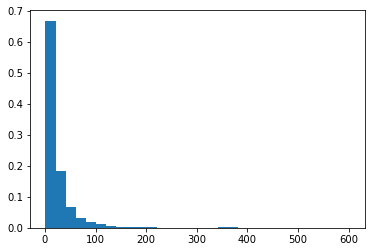

In [4]:
plt.hist(pos_comment_size,bins=30,weights=[1./len(pos_comment_size)]*len(pos_comment_size))


(array([4.16473073e-01, 2.77296727e-01, 1.28827878e-01, 6.75818374e-02,
        3.35797254e-02, 2.82998944e-02, 1.54171067e-02, 1.03484688e-02,
        5.06863780e-03, 3.80147835e-03, 2.53431890e-03, 2.53431890e-03,
        1.90073918e-03, 8.44772967e-04, 1.47835269e-03, 2.11193242e-04,
        6.33579725e-04, 6.33579725e-04, 2.11193242e-04, 4.22386484e-04,
        2.11193242e-04, 2.11193242e-04, 2.11193242e-04, 0.00000000e+00,
        8.44772967e-04, 2.11193242e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.11193242e-04]),
 array([  1.,  14.,  27.,  40.,  53.,  66.,  79.,  92., 105., 118., 131.,
        144., 157., 170., 183., 196., 209., 222., 235., 248., 261., 274.,
        287., 300., 313., 326., 339., 352., 365., 378., 391.]),
 <a list of 30 Patch objects>)

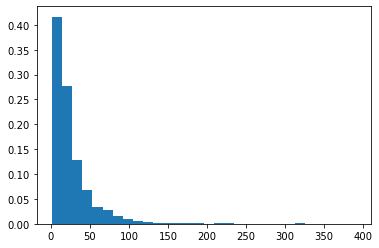

In [5]:
plt.hist(neg_comment_size,bins=30,weights=[1./len(neg_comment_size)]*len(neg_comment_size))

In [6]:
# TODO： 分别列出训练数据中正负样本里的top 20单词（可以做适当的stop words removal）。 
from nltk.corpus import stopwords
import string
stop_words = "data/cn_stopwords.txt"
stop_words_list = []
for line in open(stop_words):
    stop_word = line.strip()
    stop_words_list.append(stop_word)
    
from collections import Counter

pos_word_count=[]
neg_word_count=[]



for train_comment, train_label in zip(train_comments, train_labels):
    l=str.maketrans('','',string.punctuation)
    train_comment = str(train_comment).translate(l)
    
    seg_list = list(jieba.cut(train_comment.rstrip(), cut_all=False))
    
    for word in seg_list:
        word = word.rstrip()
        if word not in stop_words_list and len(word)>0:
            if train_label==1:
                pos_word_count.append(word)
            else:
                neg_word_count.append(word)
                
counter1 = Counter(pos_word_count)
word_freq1 = counter1.most_common(20)
counter2 = Counter(neg_word_count)
word_freq2 = counter2.most_common(20)
print(word_freq1)
print(word_freq2)




[('不错', 1076), ('买', 950), ('喜欢', 915), ('没有', 579), ('非常', 556), ('一个', 505), ('卓越', 504), ('本书', 475), ('书', 443), ('会', 415), ('说', 407), ('感觉', 387), ('中', 357), ('the', 339), ('…', 322), ('很多', 309), ('听', 309), ('质量', 306), ('内容', 287), ('现在', 280)]
[('买', 870), ('没有', 692), ('卓越', 535), ('说', 487), ('没', 275), ('质量', 270), ('一个', 258), ('太', 256), ('喜欢', 244), ('东西', 243), ('问题', 241), ('现在', 236), ('感觉', 230), ('内容', 218), ('知道', 217), ('书', 214), ('听', 211), ('想', 211), ('不能', 198), ('手机', 196)]


##### Text Cleaning: 文本处理部分 （10分）

In [7]:
# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 停用词过滤
#   2. 去掉特殊符号
#   3. 去掉数字（比如价格..)
#   4. ...
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.
train_comments_new = [] 
test_comments_new = []

    
from collections import Counter




for train_comment in train_comments:
    l=str.maketrans('','',string.punctuation)
    train_comment = str(train_comment).translate(l)
    
    train_seg_list = list(jieba.cut(train_comment.rstrip(), cut_all=False))
    
    
    train_words_list = []

    
    for word in train_seg_list:
        word = word.rstrip()
        if word not in stop_words_list and not word.isdigit():
            train_words_list.append(word)

    new_train_comment = ' '.join(train_words_list)
    train_comments_new.append(new_train_comment)
    
for test_comment in test_comments:
    l=str.maketrans('','',string.punctuation)
    train_comment = str(train_comment).translate(l)
    
    test_seg_list = list(jieba.cut(test_comment.rstrip(), cut_all=False))
    

    test_words_list = []
    
    for word in test_seg_list:
        word = word.rstrip()
        if word not in stop_words_list and not word.isdigit():
            test_words_list.append(word)
    new_test_comment = ' '.join(test_words_list)
    test_comments_new.append(new_test_comment)

print(len(train_comments_new))
print(len(test_comments_new))
    





12557
2500


### Feature Extraction : 从文本中提取特征 （10分）

In [8]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. 
#       参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_comments_new) # 训练数据的特征
y_train = train_labels # 训练数据的label
X_test =  vectorizer.transform(test_comments_new) # 测试数据的特征
y_test =  test_labels # 测试数据的label






print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))


(12557, 26627) (2500, 26627) (12557,) (2500,)


### Modeling: 训练模型以及选择合适的超参数 （25分）

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C
parameters = {'C':[0.00001, 0.0001, 0.001, 0.005,0.01,0.05, 0.1, 0.5,1,2,5,10]}
lr = LogisticRegression()

lr.fit(X_train, y_train).score(X_test, y_test)


clf = GridSearchCV(lr, parameters, cv=10,n_jobs=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print (clf.best_params_)








{'C': 2}


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
predictions = clf.predict(X_test)
print(confusion_matrix(y_test, clf.predict(X_test)))
print("precision: ", precision_score(y_test,predictions))
print("recall: ", recall_score(y_test,predictions))
print("accuracy: ", accuracy_score(y_test,predictions))
print("f1 score: ", f1_score(y_test,predictions))



[[ 684  566]
 [ 130 1120]]
precision:  0.66429418742586
recall:  0.896
accuracy:  0.7216
f1 score:  0.7629427792915531


In [11]:
X_train.toarray()
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from sklearn import svm
# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel

from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,2,4], 'gamma':['scale','auto'], 'kernel':('linear', 'poly', 'rbf', 'sigmoid')
        }
svc = svm.SVC()

svc.fit(X_train, y_train).score(X_test, y_test)

clf = GridSearchCV(svc, parameters, cv=10,n_jobs=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print (clf.best_params_)











{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
predictions = clf.predict(X_test)
print(confusion_matrix(y_test, clf.predict(X_test)))
print("precision: ", precision_score(y_test,predictions))
print("recall: ", recall_score(y_test,predictions))
print("accuracy: ", accuracy_score(y_test,predictions))
print("f1 score: ", f1_score(y_test,predictions))



[[ 695  555]
 [ 141 1109]]
precision:  0.6664663461538461
recall:  0.8872
accuracy:  0.7216
f1 score:  0.7611530542210019


对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization

In [30]:
# TODO: 仍然使用SVM模型，但在这里使用Bayesian Optimization来寻找最好的超参数。 
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用Bayesian Optimization https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
#       参考Bayesian Optimization开源工具： https://github.com/fmfn/BayesianOptimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = svm.SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=10)
    return cval.mean()


def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-3, 2) },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    return optimizer.max

optimize_svc(X_train,y_train)






|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        |  0.763    | -2.042    |  0.1105   |
|  2        |  0.6953   | -0.8114   |  0.9268   |
|  3        |  0.7738   |  0.8999   | -1.637    |
|  4        |  0.6786   | -1.618    |  1.009    |
|  5        |  0.6337   |  1.791    |  1.38     |
|  6        |  0.7729   |  0.9138   | -1.392    |
|  7        |  0.7627   | -1.337    | -1.204    |
|  8        |  0.7636   | -3.0      | -0.9785   |
|  9        |  0.7634   | -0.5309   | -3.0      |
|  10       |  0.7701   |  2.0      | -3.0      |
|  11       |  0.7415   | -2.814    | -3.0      |
|  12       |  0.7419   |  2.0      | -1.603    |
|  13       |  0.764    |  0.8238   | -2.999    |
|  14       |  0.7634   | -0.1242   | -1.464    |
|  15       |  0.759    | -3.0      |  0.1492   |
Final result: {'target': 0.7737690110172353, 'params': {'expC': 0.8998790405940174, 'expGamma': -1.6370369735867918}}


{'target': 0.7737690110172353,
 'params': {'expC': 0.8998790405940174, 'expGamma': -1.6370369735867918}}

In [31]:
C=10** 0.8998790405940174
gamma=10** (-1.6370369735867918)
svc = svm.SVC(C=C, gamma=gamma)
svc.fit(X_train,y_train).score(X_test,y_test)


0.6892

In [32]:
predictions = svc.predict(X_test)

In [33]:
print(confusion_matrix(y_test, predictions))
print("precision: ", precision_score(y_test,predictions))
print("recall: ", recall_score(y_test,predictions))
print("accuracy: ", accuracy_score(y_test,predictions))
print("f1 score: ", f1_score(y_test,predictions))

[[ 538  712]
 [  65 1185]]
precision:  0.6246705324196099
recall:  0.948
accuracy:  0.6892
f1 score:  0.7530981887511916


### 特征: 添加n-gram特征 (10分)
在原有tf-idf特征的基础上，添加n-gram特征（在这里我们使用bi-gram特征）。添加完之后效果是否有提升？ 为什么？

In [47]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = vectorizer.fit_transform(train_comments_new) # 训练数据的特征
y_train = train_labels # 训练数据的label
X_test =  vectorizer.transform(test_comments_new) # 测试数据的特征
y_test =  test_labels # 测试数据的label




print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(12557, 128567) (2500, 128567) (12557,) (2500,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C
parameters = {'C':[0.00001, 0.0001, 0.001, 0.005,0.01,0.05, 0.1, 0.5,1,2,5,10]}
lr = LogisticRegression()

lr.fit(X_train, y_train).score(X_test, y_test)


clf = GridSearchCV(lr, parameters, cv=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print (clf.best_params_)








/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

{'C': 5}


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
predictions = clf.predict(X_test)
print(confusion_matrix(y_test, clf.predict(X_test)))
print("precision: ", precision_score(y_test,predictions))
print("recall: ", recall_score(y_test,predictions))
print("accuracy: ", accuracy_score(y_test,predictions))
print("f1 score: ", f1_score(y_test,predictions))



[[ 734  516]
 [ 140 1110]]
precision:  0.6826568265682657
recall:  0.888
accuracy:  0.7376
f1 score:  0.7719054242002781


In [51]:
# TODO: 仍然使用SVM模型，但在这里使用Bayesian Optimization来寻找最好的超参数。 
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用Bayesian Optimization https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
#       参考Bayesian Optimization开源工具： https://github.com/fmfn/BayesianOptimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = svm.SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=10)
    return cval.mean()


def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-3, 2) },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    return optimizer.max

optimize_svc(X_train,y_train)






|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        |  0.7624   | -2.042    |  0.1105   |
|  2        |  0.7164   | -0.8114   |  0.9268   |
|  3        |  0.7716   |  0.8999   | -1.637    |
|  4        |  0.7029   | -1.618    |  1.009    |
|  5        |  0.6328   |  1.791    |  1.38     |
|  6        |  0.7653   | -0.06297  | -1.32     |
|  7        |  0.765    | -2.208    | -1.465    |
|  8        |  0.7676   |  0.04026  | -3.0      |
|  9        |  0.7684   |  2.0      | -3.0      |
|  10       |  0.7463   | -3.0      | -3.0      |
|  11       |  0.7619   | -3.0      | -0.4843   |
|  12       |  0.7606   | -1.38     | -2.99     |
|  13       |  0.7588   |  2.0      | -1.679    |
|  14       |  0.7644   | -1.302    | -0.7478   |
|  15       |  0.7677   |  1.062    | -2.63     |
Final result: {'target': 0.7715758441281476, 'params': {'expC': 0.8998790405940174, 'expGamma': -1.6370369735867918}}


{'target': 0.7715758441281476,
 'params': {'expC': 0.8998790405940174, 'expGamma': -1.6370369735867918}}

In [52]:
C=10** 0.8998790405940174
gamma=10** (-1.6370369735867918)
svc = svm.SVC(C=C, gamma=gamma)
svc.fit(X_train,y_train).score(X_test,y_test)


0.686

In [53]:
print(confusion_matrix(y_test, predictions))
print("precision: ", precision_score(y_test,predictions))
print("recall: ", recall_score(y_test,predictions))
print("accuracy: ", accuracy_score(y_test,predictions))
print("f1 score: ", f1_score(y_test,predictions))

[[ 734  516]
 [ 140 1110]]
precision:  0.6826568265682657
recall:  0.888
accuracy:  0.7376
f1 score:  0.7719054242002781


In [54]:
vectorizer.get_feature_names()

['1000ma',
 '1000ma 待机',
 '1000rpm',
 '100g',
 '100g 音乐',
 '100ml',
 '100ml 150ml',
 '100rmb',
 '100rmb 这才',
 '1024x576',
 '1024x576 一定',
 '1024x576 支持',
 '1024x576 高清',
 '1050mah',
 '1050mah 可能',
 '1080p',
 '1080p 感觉',
 '10cd',
 '10cd 精装',
 '10dv',
 '10dv d版',
 '10dvd',
 '10dvd 画面质量',
 '11l',
 '120fps',
 '120fps 录像',
 '128kbps',
 '128kbps 很多歌',
 '128m',
 '128m 手机',
 '128mb',
 '128mb 一个',
 '12qt',
 '12vcdmp3',
 '12vcdmp3 节目',
 '1388rmb',
 '14dvd',
 '14dvd 另款',
 '14dvd 碟片',
 '14g',
 '14g 画质',
 '14minute',
 '14minute vehicle',
 '150ml',
 '150ml 选择',
 '15cd',
 '15cd 张学友',
 '15m',
 '15m 大层',
 '15ml',
 '15xx',
 '15xx 23xx',
 '163com',
 '163com 唐朝',
 '16k',
 '16k 厚实',
 '175rmb',
 '175rmb 去掉',
 '1800ma',
 '1800ma 电池',
 '183club',
 '183club 支持',
 '186g',
 '186g 文件',
 '186g 这是',
 '1999s',
 '1999s bailamos',
 '1a',
 '1a 市售',
 '1cm',
 '1cm 裂纹',
 '1db',
 '1dvd',
 '1g',
 '1g 一倍',
 '1g 主板',
 '1g 内容',
 '1g 最大',
 '1g 现在',
 '1g 起来',
 '1gt',
 '1gt 里面',
 '1k',
 '1k 文件',
 '1mp32003',
 '1mp32003 节目',
 '1st